###### This workshop is based on this article by five thirty eight: http://fivethirtyeight.com/features/there-are-922-unisex-names-in-america-is-yours-one-of-them/

###### Read in the file "unisex_names_table.csv" which can be found in data/five_thirty_eight_data/unisex-names/unisex_names_table.csv in this repo. For this exercise, you will need pandas, numpy, and matplotlib. the latter you should import like so:
`import matplotlib.pyplot as plt` 

`%matplotlib inline`



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#file??

###### examine the first 10 rows of the data frame with head()

In [4]:
f = pd.read_csv("../DAT-NYC-29/data/five_thirty_eight_data/unisex-names/unisex_names_table.csv")
f.tail()

,Unnamed: 0,name,total,male_share,female_share,gap
914,915,Eaden,102.319579,0.572761,0.427239,0.145521
915,916,Inioluwa,101.384201,0.352729,0.647271,0.294542
916,917,Gwin,101.243364,0.562137,0.437863,0.124273
917,918,Yacine,100.230400,0.544599,0.455401,0.089198
918,919,Aeon,100.211040,0.464835,0.535165,0.070331


###### Drop the column with the name "Unnamed: 0"

In [5]:
del f["Unnamed: 0"]
f.head()

,name,total,male_share,female_share,gap
0,Casey,176544.328149,0.584287,0.415713,0.168573
1,Riley,154860.665173,0.507639,0.492361,0.015278
2,Jessie,136381.830656,0.477834,0.522166,0.044331
3,Jackie,132928.788740,0.421133,0.578867,0.157735
4,Avery,121797.419516,0.335213,0.664787,0.329574


###### Create a new DataFrame containing only the first name and the share of male and female names

In [6]:
new_f = f[['name', 'male_share', 'female_share']]  
new_f.head()

,name,male_share,female_share
0,Casey,0.584287,0.415713
1,Riley,0.507639,0.492361
2,Jessie,0.477834,0.522166
3,Jackie,0.421133,0.578867
4,Avery,0.335213,0.664787


###### Set `name` as the index

In [91]:
df = new_f.set_index('name')

In [92]:
df.head()

,male_share,female_share
name,,
Casey,0.584287,0.415713
Riley,0.507639,0.492361
Jessie,0.477834,0.522166
Jackie,0.421133,0.578867
Avery,0.335213,0.664787


###### Is the index unique?

In [93]:
df.index.is_unique

True

In [94]:
df.index.str.len()

Int64Index([5, 5, 6, 6, 5, 5, 6, 5, 4, 7,
            ...
            6, 6, 5, 5, 8, 5, 8, 4, 6, 4],
           dtype='int64', name=u'name', length=919)

###### Create a new column called name_length with the length of the name

In [95]:
df.index.str.len()

Int64Index([5, 5, 6, 6, 5, 5, 6, 5, 4, 7,
            ...
            6, 6, 5, 5, 8, 5, 8, 4, 6, 4],
           dtype='int64', name=u'name', length=919)

In [96]:
#df['name_length'] = df.index.str.len()
df['name_length'] = df.index.str.len()

In [97]:
df.head()

,male_share,female_share,name_length
name,,,
Casey,0.584287,0.415713,5
Riley,0.507639,0.492361,5
Jessie,0.477834,0.522166,6
Jackie,0.421133,0.578867,6
Avery,0.335213,0.664787,5


###### Practicing selecting columns. Select just the "male_share" column. Then select both the male_share and the female_share column. Try using the brackets [ ], and loc. Do the results look like a DataFrame? 

In [98]:
df.loc['Jackie']

male_share      0.421133
female_share    0.578867
name_length     6.000000
Name: Jackie, dtype: float64

In [99]:
df.loc['Casey':'Jessie']

,male_share,female_share,name_length
name,,,
Casey,0.584287,0.415713,5
Riley,0.507639,0.492361,5
Jessie,0.477834,0.522166,6


In [100]:
df[['male_share', 'female_share']].head()

,male_share,female_share
name,,
Casey,0.584287,0.415713
Riley,0.507639,0.492361
Jessie,0.477834,0.522166
Jackie,0.421133,0.578867
Avery,0.335213,0.664787


In [101]:
male_share = f[['name', 'male_share']]
male_share.head()

,name,male_share
0,Casey,0.584287
1,Riley,0.507639
2,Jessie,0.477834
3,Jackie,0.421133
4,Avery,0.335213


In [102]:
male_share.loc[0]

name             Casey
male_share    0.584287
Name: 0, dtype: object

In [103]:
co_share = f[['name', 'male_share', 'female_share']]
co_share.head()

,name,male_share,female_share
0,Casey,0.584287,0.415713
1,Riley,0.507639,0.492361
2,Jessie,0.477834,0.522166
3,Jackie,0.421133,0.578867
4,Avery,0.335213,0.664787


###### Can you select the columns `male_share` and `female_share` and only the rows with name `Casey` and `Riley`?

In [104]:
df.head()

,male_share,female_share,name_length
name,,,
Casey,0.584287,0.415713,5
Riley,0.507639,0.492361,5
Jessie,0.477834,0.522166,6
Jackie,0.421133,0.578867,6
Avery,0.335213,0.664787,5


In [105]:
df.loc[['Casey','Riley']][['male_share','female_share']]

,male_share,female_share
name,,
Casey,0.584287,0.415713
Riley,0.507639,0.492361


###### Now try selecting all names with a male_share < 40%

In [106]:
#f.loc[f['name'] == 'Casey']
df.loc[df['male_share'] < 0.4].head()

,male_share,female_share,name_length
name,,,
Avery,0.335213,0.664787,5
Jody,0.352068,0.647932,4
Kendall,0.372367,0.627633,7
Payton,0.334358,0.665642,6
Pat,0.369034,0.630966,3


###### Create another column, `gender`, which tells if you the name was, on average, a male or female name

In [127]:
df.loc[df['male_share'] > 0.49, 'Gender'] = True
df.loc[df['female_share'] > 0.49, 'Gender'] = False
df.head()

,male_share,female_share,name_length,Gender
name,,,,
Casey,0.584287,0.415713,5,Male
Riley,0.507639,0.492361,5,Female
Jessie,0.477834,0.522166,6,Female
Jackie,0.421133,0.578867,6,Female
Avery,0.335213,0.664787,5,Female


###### What is the mean, mean, std of each column? (hint use .desrcribe()

In [140]:
df[['male_share', 'female_share', 'name_length']].describe()

,male_share,female_share,name_length
count,919.000000,919.000000,919.000000
mean,0.507206,0.492794,5.620239
std,0.099423,0.099423,1.413622
min,0.333561,0.333722,2.000000
25%,0.418570,0.408107,5.000000
50%,0.514173,0.485827,6.000000
75%,0.591893,0.581430,6.000000
max,0.666278,0.666439,13.000000


###### What are the longest and shortest names?

In [151]:
longst_names = df.loc[df['name_length'] == df['name_length'].max(axis=0)]
longst_names

,male_share,female_share,name_length,Gender
name,,,,
Oluwadamilola,0.353751,0.646249,13,Female
Oluwademilade,0.661305,0.338695,13,Male
Oluwadarasimi,0.366754,0.633246,13,Female


In [152]:
shortest_names = df.loc[df['name_length'] == df['name_length'].min(axis=0)]
shortest_names

,male_share,female_share,name_length,Gender
name,,,,
An,0.460548,0.539452,2,Female
Le,0.387720,0.612280,2,Female
De,0.513364,0.486636,2,Male
Yu,0.488130,0.511870,2,Female
Ji,0.386014,0.613986,2,Female
Ja,0.659898,0.340102,2,Male
Mc,0.349445,0.650555,2,Female
Da,0.614631,0.385369,2,Male
Eh,0.584052,0.415948,2,Male


###### Do male or female names have longer means and medians?
hint: user a groupby here. You may also need numpy. Your ideal result should have 3 columns: gender, mean, and median

In [166]:
df.groupby('Gender')['name_length'].mean()

Gender
Female    5.705357
Male      5.539278
Name: name_length, dtype: float64

In [167]:
df.groupby('Gender')['name_length'].median()

Gender
Female    6
Male      6
Name: name_length, dtype: int64

###### Plot length of name vs male_share. 
Hint here is how you do it:

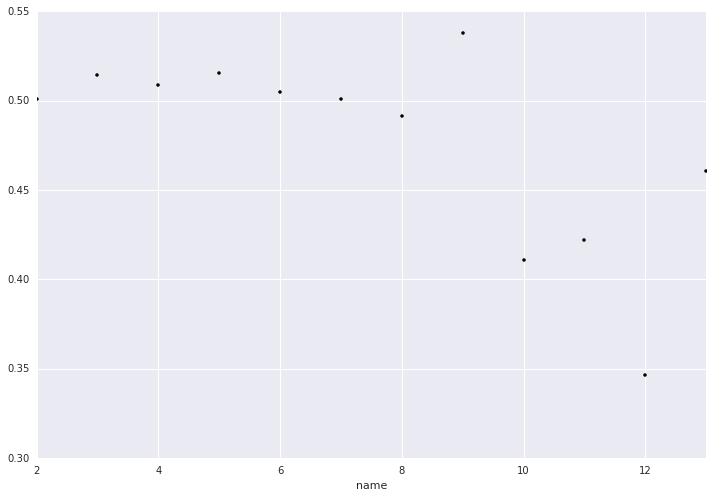

In [171]:
(df.groupby(df.index.str.len())
     .male_share
     .mean()
     .plot(style='.k',figsize=(12,8)))

###### Now import the library seaborn and run that function again. If you don't have seaborn, in your terminal type "pip install seaborn". If you don't have pip, type "sudo easy_install pip". Cygwin users, if you don't have pip, you need to open up the cygwin setup.exe and add it.

In [170]:
import seaborn

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


###### Which first letter has the highest percentage of primarily Female names?
Hint: this is difficult. You'll need a groupby, unstack, and will need to access a multi-index.